## Import required Libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style="darkgrid")

In [4]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [5]:
from nltk import sent_tokenize
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
import string

## Load data from csv file

In [2]:
df=pd.read_csv('../Data/data.csv')
df.shape

(1800, 12)

In [3]:
df.head(3)

,title,score,id,body,author,flair,url,comms_num,created,comment,authors,combined_features
0,"Lost my Job, Sick Mother and Paralysed Dad, In...",1042,g014wc,Hi....It's really tough time for everyone. I r...,sanand_satwik,AskIndia,https://www.reddit.com/r/india/comments/g014wc...,132,1.586742e+09,I'm a freelancer. Don't listen to the idiots ...,hashedram diabapp xataari Aashayrao sarcrasti...,"Lost my Job, Sick Mother and Paralysed Dad, In..."
1,Why does the government come with a begging bo...,647,fxofyu,"We have floods, terrorist attacks, famines due...",TWO-WHEELER-MAFIA,AskIndia,https://www.reddit.com/r/india/comments/fxofyu...,205,1.586448e+09,I don't understand why they don't use money f...,Kinky-Monk ak32009 fools_eye None DwncstSheep...,Why does the government come with a begging bo...
2,Mother's condition is going worse due to hepat...,756,g0zlly,"Hi folks, I really appreciate the warm respons...",sanand_satwik,AskIndia,https://www.reddit.com/r/india/comments/g0zlly...,92,1.586871e+09,If anyone knows who is influential on Twitter...,AlternativeDrop6 TheRobotsHaveCome lanky32 pl...,Mother's condition is going worse due to hepat...


# Data Cleaning
Each sentence is split into individual words (tokenization) and punctuation (!,#@..) is filtered out. Further stop words are removed as they represent major part of english language without providing any meaning information about the context.

In [6]:
def clean(x):
    tokens = word_tokenize(x)
    # convert to lower case
    tokens = [w.lower() for w in tokens]
    # remove punctuation from each word
    table = str.maketrans('', '', string.punctuation)
    stripped = [w.translate(table) for w in tokens]
    # remove remaining tokens that are not alphabetic
    words = [word for word in stripped if word.isalpha()]
    # filter out stop words
    words = [w for w in words if not w in stop_words]
    return (' ').join(words)

In [7]:
df['clean_title']=df['title'].apply(lambda x: clean(x))

In [10]:
flairs= df.groupby(['flair'])

Lets see if our data is balanced. Balanced data is more useful for obtaining a clear analysis of the context present in each category of flair.

In [11]:
flairs['flair'].count()

flair
AskIndia              200
Business/Finance      200
Food                  200
Non-Political         200
Photography           200
Policy/Economy        200
Politics              200
Science/Technology    200
Sports                200
Name: flair, dtype: int64

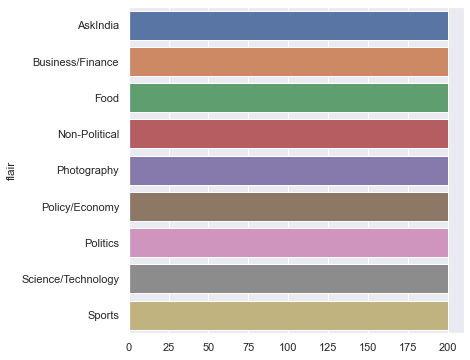

In [8]:
flair_count=flairs['flair'].count()
plt.figure(0,figsize=(6,6))
sns.barplot(flair_count.values, flair_count.index)

Yes. As we can see that we equal number of posts from each flair, we can further work on each category to obtain some inference about our data.

## Comment Count in each Category

Lets check the total number of comments in each category of flair.

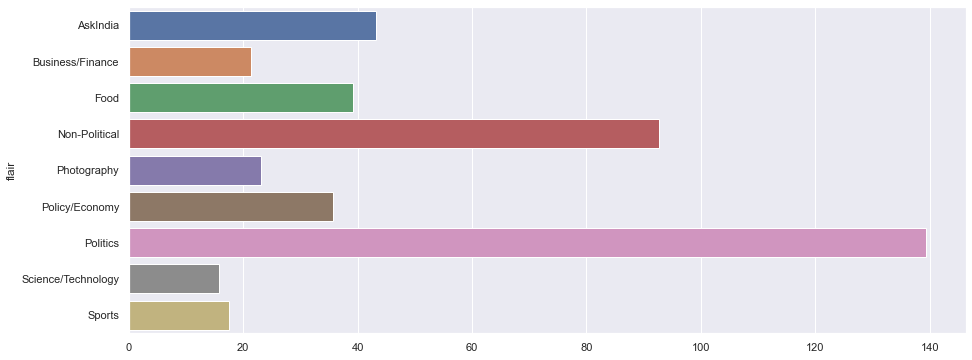

In [12]:
comment_count=flairs['comms_num'].mean()
plt.figure(2,figsize=(15,6))
splot=sns.barplot(comment_count.values, comment_count.index)
# splot.set(xscale="log")
plt.show()

As we can see from the graph that the total comments for each category varies a lot from each other. Conclusion from the graph:
* Highest Number of user engagement happens in Political posts. Next closest category is Non-political but this flair represents the similar content of the posts as in Politics. Hence the high number of comments.
* Science/Technology posts are least interactive. Hence, a least percentage of people subscribed to r/india are interested in Scientific posts/news.
* Food, AskIndia, Economy shows almost equal scale of comments.

## Average word count for all posts in each flair

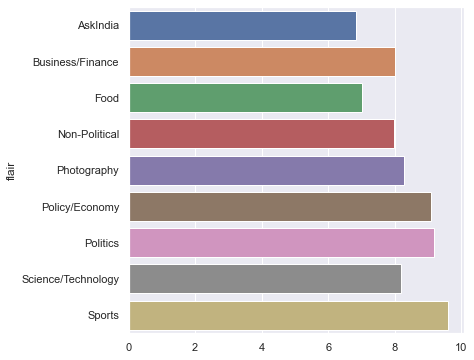

In [13]:
# Words count in title
df['Title_wc']=df['clean_title'].apply(lambda x:len(list(str(x).split())))
plt.figure(3,figsize=(6,6))
flairs= df.groupby(['flair'])['Title_wc'].mean()
sns.barplot(flairs.values, flairs.index)

Each category of flair have more or less the same average number of words in the post. Hence, we cannot obtaine

## Top words in all data

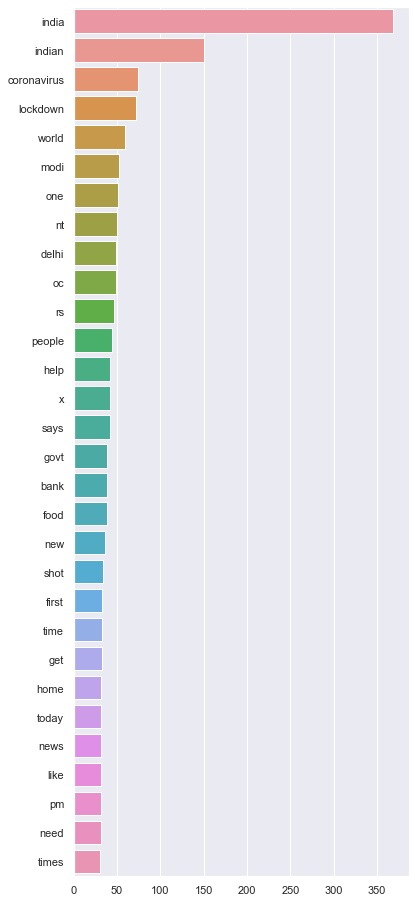

In [17]:
# Top 50 most used words in title
all_word_count=df['clean_title'].str.split(expand=True).unstack().value_counts()
plt.figure(3,figsize=(6,16))
start_ind,end_ind=0,30
sns.barplot(all_word_count[start_ind:end_ind].values,all_word_count[start_ind:end_ind].index)

As top most common words see from the data were parts of speech such as conjunction, prepositions, pronouns (to, for, he, you, etc.), these words were cleaned in the beginning using nltk library.
* Now, from our previous inference, we saw that most words belonged to political category. Hence, the words related to politics are more prevelant such as Delhi, Modi, India, says, World, PM, Bank etc.
* Also as the posts are obtained from reddit amidst the COVID-19 Pandemic, words such as Coronavirus, Lockdown are more popular among the posts.

## Top words in each flair category

In the previous plot, we saw the pervasiveness of political words in the complete data. To analyse the occurence of common words that are non political, we would have to see each frequency plot for every category of flair.

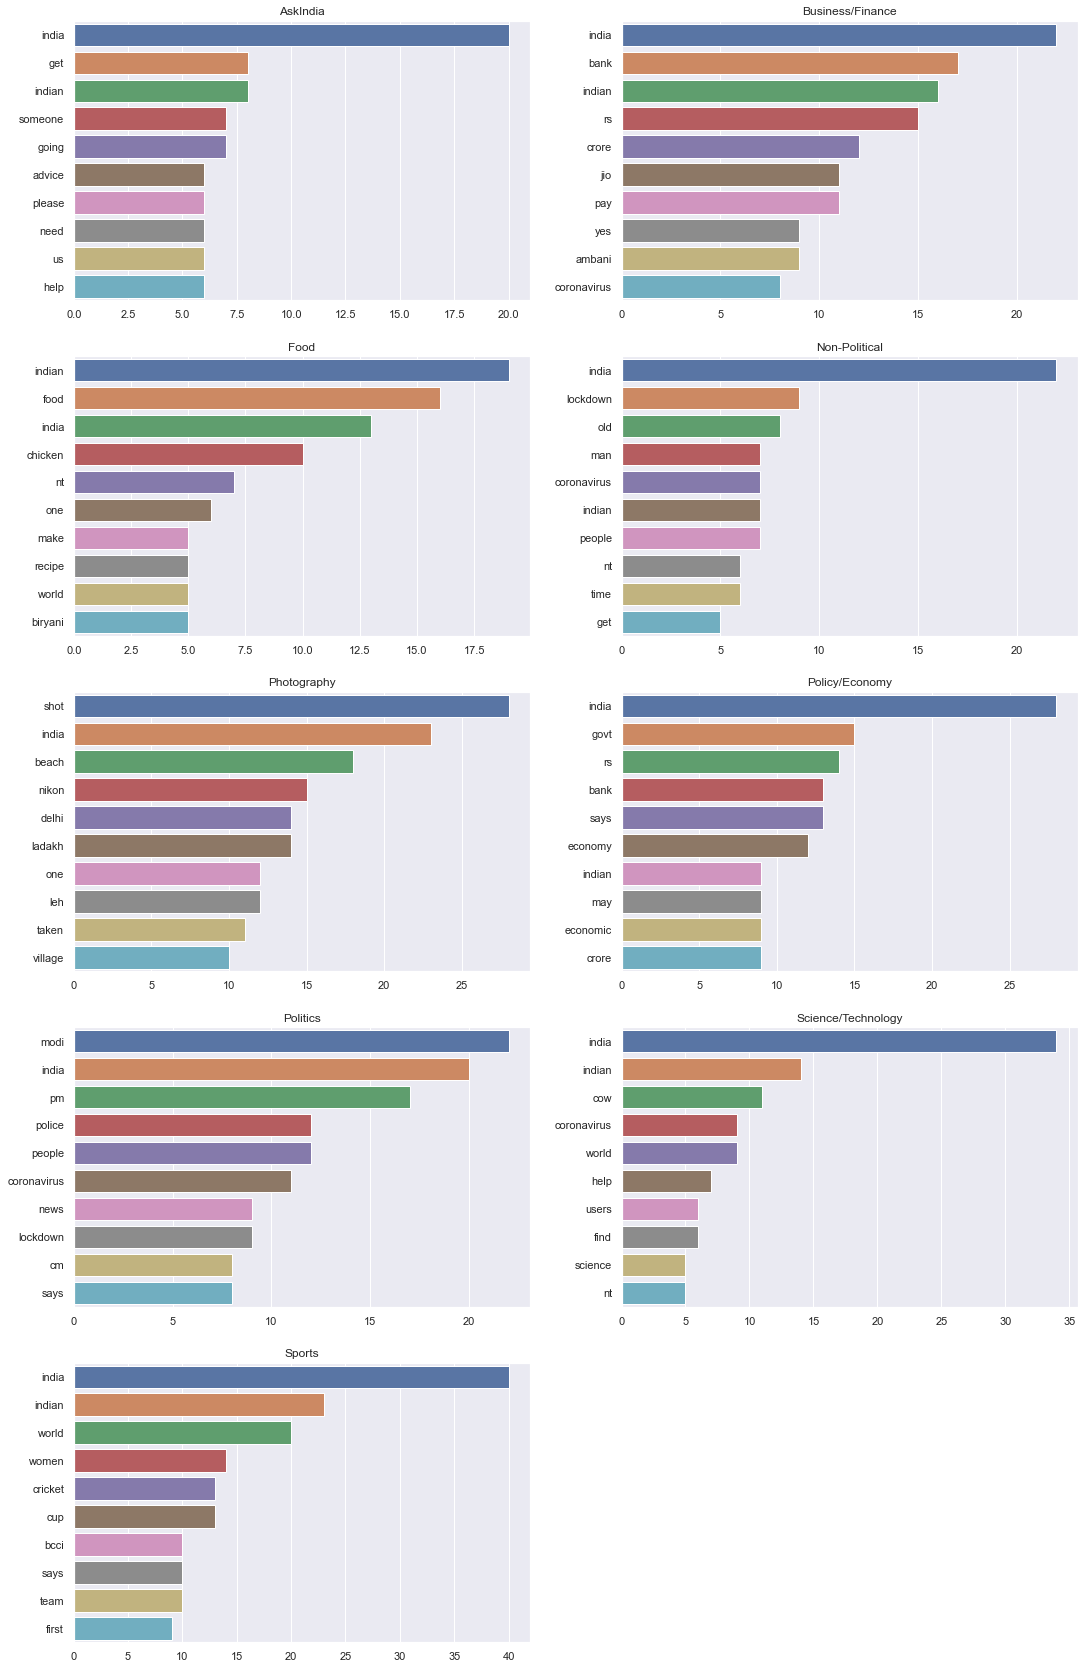

In [23]:
flair_all_words=df.groupby('flair').agg({'clean_title':sum})
plt.figure(0,figsize=(18,36))
start_ind,end_ind=0,10
for i in range(len(flair_all_words)):
    plt.subplot(6,2,i+1)
    plt.title(flair_all_words.index[i])
    ix,iy= np.unique(str(flair_all_words['clean_title'][i]).split(),return_counts=True)
    iy_ind=np.argsort(-iy)
    sns.barplot(iy[iy_ind[start_ind:end_ind]],ix[iy_ind[start_ind:end_ind]])
plt.show()
#     break

Inference of top 20 words from each flair:
1. AskIndia: India, Please, someone, advice as popular as this flair represents asking an advice from someone and suggestions as responses.
2. Finance: Bank, India, crore, Jio, ambani are popular words
3. Food: Indian, Chicken, Biryani, food
4. Sports: India, cricket, bcci, team
and so on..
